FAKE NEWS DETECTION

Some info about our dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake:
           0: Real News
           1: Fake news


Importing the libraries

In [1]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
# import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
# from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [4]:
# loading the dataset to a pandas DataFrame
df = pd.read_csv('train.csv')

In [5]:
#data observation
def data_obs():
    print("training dataset size:")
    print(df.shape)
    print(df.head(10))

In [6]:
check=data_obs()
print(check)

training dataset size:
(20800, 5)
   id                                              title  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2   2                  Why the Truth Might Get You Fired   
3   3  15 Civilians Killed In Single US Airstrike Hav...   
4   4  Iranian woman jailed for fictional unpublished...   
5   5  Jackie Mason: Hollywood Would Love Trump if He...   
6   6  Life: Life Of Luxury: Elton John’s 6 Favorite ...   
7   7  Benoît Hamon Wins French Socialist Party’s Pre...   
8   8  Excerpts From a Draft Script for Donald Trump’...   
9   9  A Back-Channel Plan for Ukraine and Russia, Co...   

                         author  \
0                 Darrell Lucus   
1               Daniel J. Flynn   
2            Consortiumnews.com   
3               Jessica Purkiss   
4                Howard Portnoy   
5               Daniel Nussbaum   
6                           NaN   
7               Alissa J.

In [7]:
df.shape

(20800, 5)

In [8]:
# print the first 5 rows of the dataframe
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


<AxesSubplot: xlabel='label', ylabel='count'>

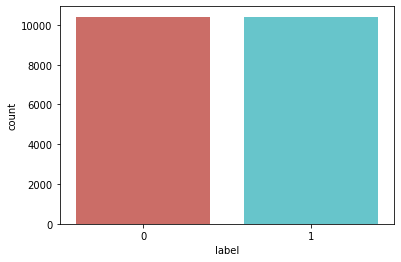

In [9]:
def create_distribution(dataFile):
    
    return sb.countplot(x='label', data=dataFile, palette='hls')
    

#by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(df)

In [10]:
# counting the number of missing values in the dataset
def data_qualityCheck():
    
    print("Checking data qualitites...")
    print(df.isnull().sum())
        
    print("check finished.")

In [11]:
quality_check=data_qualityCheck()
print(quality_check)

Checking data qualitites...
id           0
title      558
author    1957
text        39
label        0
dtype: int64
check finished.
None


<AxesSubplot: >

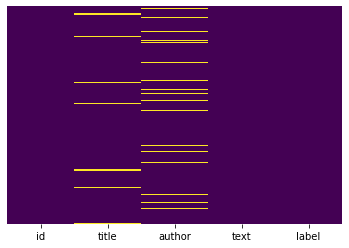

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
# replacing the null values with empty string
df = df.fillna('')

<AxesSubplot: >

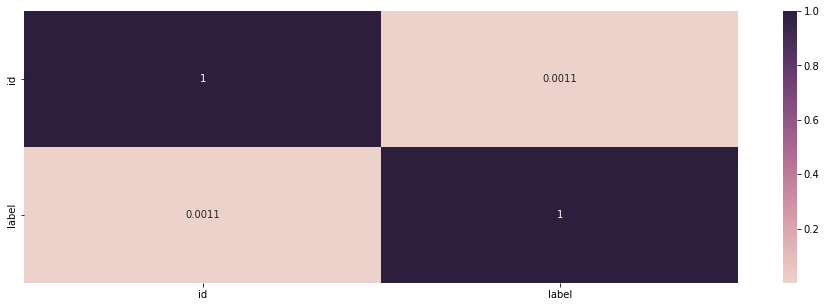

In [14]:
tc = df.corr()   #shows corelation in matrix form
plt.figure(figsize = (16,5))
sns.heatmap(tc, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

In [15]:
# merging the author name and news title
df['content'] = df['author']+' '+df['title']

In [16]:
print(df['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [17]:
# separating the data & label
X = df.drop(columns='label', axis=1)
y = df['label']

In [18]:
print(X)
print(y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [19]:
X

,id,title,author,text,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Howard Portnoy Iranian woman jailed for fictio...
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,"Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,Michael J. de la Merced and Rachel Abrams Macy...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...","Alex Ansary NATO, Russia To Hold Parallel Exer..."


Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [20]:
port_stem = PorterStemmer()

In [21]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [22]:
df['content'] = df['content'].apply(stemming)

In [23]:
print(df['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [24]:
#separating the data and label
X = df['content'].values
y = df['label'].values

In [25]:
X

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

In [26]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [27]:
print(y)

[1 0 1 ... 0 1 1]


In [28]:
y.shape


(20800,)

In [29]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

Splitting the dataset to training & test data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 ,random_state=42)

In [31]:
print(X_train)

  (0, 16996)	0.09685070635370717
  (0, 16226)	0.21063239079029725
  (0, 15295)	0.09502920994964925
  (0, 13336)	0.3144912427771572
  (0, 13270)	0.1991770498744497
  (0, 12120)	0.3268442912664756
  (0, 11598)	0.2297243945103756
  (0, 10306)	0.09361782614883789
  (0, 9588)	0.2032987902589208
  (0, 9104)	0.23963004413017816
  (0, 6508)	0.41132403426625336
  (0, 5949)	0.3573916359024015
  (0, 5218)	0.32079776888154393
  (0, 4745)	0.36290763852170527
  (1, 16996)	0.07294527298682107
  (1, 15295)	0.07157337228066343
  (1, 13544)	0.32675355801781203
  (1, 13270)	0.15001464442334736
  (1, 13167)	0.23686610475057468
  (1, 11179)	0.3402120330275197
  (1, 10306)	0.0705103570429287
  (1, 7324)	0.24336339254884945
  (1, 7050)	0.2526146383083224
  (1, 5343)	0.2986294682952558
  (1, 3868)	0.26917749416196546
  :	:
  (14556, 277)	0.26249197175441774
  (14557, 16996)	0.11875104913510133
  (14557, 15295)	0.11651766729286954
  (14557, 14594)	0.4668797273883944
  (14557, 12906)	0.3737884244063731
  (14557

Training the Model: Logistic Regression

In [32]:
model=LogisticRegression()

In [33]:
model.fit(X_train, y_train)

LogisticRegression()

accuracy score

In [34]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = metrics.accuracy_score(X_train_prediction, y_train)

In [35]:
print('Accuracy score of the training data : ', training_data_accuracy*100,"%")

Accuracy score of the training data :  98.65384615384616 %


In [36]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = metrics.accuracy_score(X_test_prediction, y_test)

In [37]:
print('Accuracy score of the test data : ', test_data_accuracy,"%")

Accuracy score of the test data :  0.9725961538461538 %


In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[3012   35]
 [ 136 3057]]
Confusion matrix, without normalization


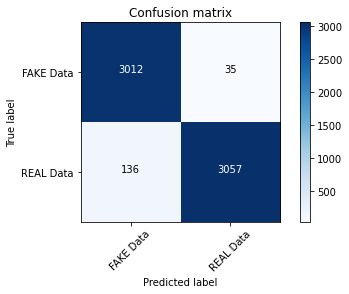

In [39]:
cm = metrics.confusion_matrix(X_test_prediction, y_test)
print(cm)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

Making a Predictive System

In [40]:
X_new = X_test[8]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [41]:
print(y_test[8])

1


In [42]:
from sklearn.metrics import classification_report
print(classification_report(X_test_prediction, y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3047
           1       0.99      0.96      0.97      3193

    accuracy                           0.97      6240
   macro avg       0.97      0.97      0.97      6240
weighted avg       0.97      0.97      0.97      6240



In [43]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(X_test_prediction, y_test) #y_target, y_pred

0.027403846153846154

In [44]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error  
mean_squared_error(X_test_prediction, y_test)

0.027403846153846154

### PassiveAggressiveClassifier

In [45]:
#Using passive agressive classifier 
classifier = PassiveAggressiveClassifier()
classifier.fit(X_train,y_train)

PassiveAggressiveClassifier()

Accuracy: 98.97%
[[3118   30]
 [  34 3058]]
Confusion matrix, without normalization


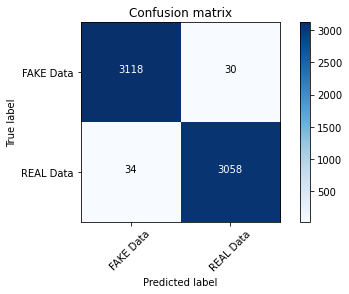

In [46]:
y_pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3148
           1       0.99      0.99      0.99      3092

    accuracy                           0.99      6240
   macro avg       0.99      0.99      0.99      6240
weighted avg       0.99      0.99      0.99      6240



In [48]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test, y_pred) #y_target, y_pred

0.010256410256410256

In [49]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error  
mean_squared_error(y_test, y_pred)

0.010256410256410256

### SVM

In [50]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
acc_svm=metrics.accuracy_score(y_pred,y_test)

In [51]:
print("the accuracy that we got for test set using svm is:",acc_svm*100,"%")

the accuracy that we got for test set using svm is: 98.9423076923077 %


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3148
           1       0.99      0.99      0.99      3092

    accuracy                           0.99      6240
   macro avg       0.99      0.99      0.99      6240
weighted avg       0.99      0.99      0.99      6240



In [53]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test, y_pred) #y_target, y_pred

0.010576923076923078

In [54]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error  
mean_squared_error(y_test, y_pred)

0.010576923076923078

[[3114   32]
 [  34 3060]]
Confusion matrix, without normalization


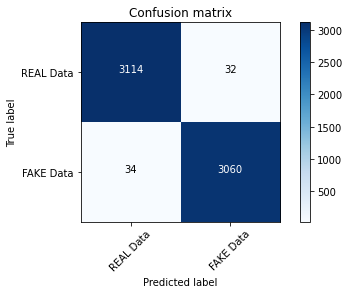

In [55]:
cm = metrics.confusion_matrix(y_pred,y_test)
print(cm)
plot_confusion_matrix(cm, classes=['REAL Data','FAKE Data'])

### Logistic Regression from scratch

In [56]:
class Logistic_Regression():


  # declaring learning rate & number of iterations (Hyperparametes)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations



  # fit function to train the model with dataset
  def fit(self, X, Y):

    # number of data points in the dataset (number of rows)  -->  m
    # number of input features in the dataset (number of columns)  --> n
    self.m, self.n = X.shape


    #initiating weight & bias value

    self.w = np.zeros(self.n) #initial vector with zeros1
    
    self.b = 0

    self.X = X

    self.Y = Y


    # implementing Gradient Descent for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()



  def update_weights(self):

    # Y_hat formula (sigmoid function)

    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))    


    # derivaties

    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))  #1/m((X)T * (A - Y))

    db = (1/self.m)*np.sum(Y_hat - self.Y)   # 1/m(A - Y)


    # updating the weights & bias using gradient descent

    self.w = self.w - self.learning_rate * dw

    self.b = self.b - self.learning_rate * db


  # Sigmoid Equation & Decision Boundary

  def predict(self, X):

    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) )) 
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred


In [60]:
# initialize logistic regression model
logreg = Logistic_Regression(0.01,2000)

# fit the model to the training data
logreg.fit(X_train, y_train)

# predict on test data
y_pred = logreg.predict(X_test)

# print accuracy
print('accuracy_score')
print(metrics.accuracy_score(y_test,y_pred))

accuracy_score
0.9725961538461538


### SVM from scratch

In [61]:
class SVM:

  #The class has a constructor method, __init__, that takes in three parameters: iterations, lr, and lambdaa. 
  #These parameters are used to set the number of iterations, learning rate, and regularization strength of the model, respectively. 
  #The class also has an instance variable w which is used to store the weight of the model and b that is used to store the bias of the model.
    def __init__(self, iterations=1000, lr=0.01, lambdaa=0.01):
        self.lambdaa = lambdaa  # This line assigns the value of the lambdaa parameter passed to the constructor to the self.lambdaa variable.
        self.iterations = iterations
        self.lr = lr
        self.w = None
        self.b = None
        
#Takes in an input X and sets the initial values of the w and b to zero. The shape of w is determined by number of features in the input data and b is always initialized to 0.
    def initialize_parameters(self,X):
        m, n = X.shape   # get number of examples and number of features from input data
        #initialize w to array of zeros of the shape of number of features
        # Note intializing w to random array will sometimes yield better/worse results
        self.w = np.zeros(n)
        #intialize b to zero
        self.b = 0

  #implementing a gradient descent algorithm for training a linear support vector machine (SVM) model. 
  #The SVM is a supervised learning model that can be used for both classification and regression problems. 
  #In this case, it is being used for binary classification. 
  #The function takes in two inputs, X and y, which represent the feature data and target labels, respectively.  
  
    def gradient_descent(self, X, y):
    #unction converts y from a binary classification problem to a linear classification problem by setting y to -1 if it's equal or less than 0, and 1 otherwise. 
    #Then the function loops over the indexes and elements in X.
        y_ = np.where(y <= 0, -1, 1)
        # set y to -1 if it's equal or less than 0, else set it to 1 to convert the binary classification problem to a linear classification problem.
        # loop over the indexes and elements in X
        for i, x in enumerate(X):  
          #enumerate(X)" is a for loop that iterates over the elements in the input feature data X. 
          #The "enumerate" function is used to loop over the elements in X while also keeping track of the index of the current element.


            #Check if the condition mentioned above is true and set dw, db accordingly
            if y_[i] * (np.dot(x, self.w) - self.b) >= 1:
                dw = 2 * self.lambdaa * self.w
                db = 0
            else:
                dw = 2 * self.lambdaa * self.w - np.dot(x, y_[i])
                db = y_[i]
                #update the weights using update weight function
                #function updates the weights using the update_parameters(dw, db) function.
            self.update_parameters(dw,db)

        # class for a machine learning model that uses gradient descent to optimize its parameters. 
        #The update_parameters method updates the model's weights (self.w) and bias (self.b) using the gradients (dw and db) and a learning rate (self.lr). 
    def update_parameters(self, dw, db):
        
        self.w = self.w - self.lr * dw
        self.b = self.b - self.lr * db

        # The fit method initializes the model's parameters using the initialize_parameters method and 
        #then repeatedly updates the parameters using the gradient_descent method for a specified number of iterations (self.iterations).
    def fit(self, X, y):
        #intialize parameters
        self.initialize_parameters(X)
        #loop for specified number of iterations
        for i in range(self.iterations):
            #get the gradients and update weights
            self.gradient_descent(X,y)
            
    # The function takes in a single argument X, which is the input data that the model will use to make predictions. 
    #The function then calculates the dot product of X and the object's w attribute (which are likely the model's weights) and subtracts the object's b attribute (likely the model's bias).         
    def predict(self, X):
        # get the outputs
        output = np.dot(X, self.w) - self.b
        # get the signs of the labels depending on if it's greater/less than zero
        #The result of this calculation is stored in the variable output. 
        #The function then calculates the sign of output and stores the result in the variable label_signs
        label_signs = np.sign(output)
        
        #function uses numpy's np.where method to set the values in label_signs that are less than or equal to -1 to 0 and all other values to 1, and 
        #stores the result in the variable predictions. 
        #The function then returns the predictions variable.

        #set predictions to 0 if they are less than or equal to -1 else set them to 1
        predictions = np.where(label_signs <= -1, 0, 1)
        return predictions

In [63]:
model = SVM()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test,predictions))

Accuracy:  0.989423076923077
